# Webscraping

In [5]:
import pandas as pd
import requests as r
from bs4 import BeautifulSoup as bs4
import csv

In [10]:
normalMap_minus = {'à': 'a', 'á': 'a', 'â': 'a', 'ã': 'a', 'ä': 'a', 'ª': 'a',
                 'è': 'e', 'é': 'e', 'ê': 'e', 'ë': 'e',
                 'í': 'i', 'ì': 'i', 'î': 'i', 'ï': 'i',
                 'ò': 'o', 'ó': 'o', 'ô': 'o', 'õ': 'o', 'ö': 'o', 'º': 'O',
                 'ù': 'u', 'ú': 'u', 'û': 'u', 'ü': 'u',
                 'ñ': 'n',
                 'ç': 'c',
                 '³': '3', '²': '2', '¹': '1'}

normalize = str.maketrans(normalMap)

print("Bogotá".translate(normalize))

Bogota


In [2]:
def make_indeed_url(search_job, search_location):
    job = search_job.replace(' ', '-')
    location = search_location.replace(' ', '-').lower().translate(normalize)
    indeed_job_url = r.get(f'https://www.elempleo.com/co/ofertas-empleo/{location}?trabajo={job}')
    return indeed_job_url

In [19]:
def scrape_job_card(job_meta):
    try:
        job_title = job_meta.find('a', {'class':'text-ellipsis js-offer-title'}).get_text().lstrip('new\n')
    except:
        job_title = 'No job title found'
    try:
        company_name = job_meta.find('span',{'class':'info-company-name js-offer-company'}).get_text()
    except:
        company_name = 'No Company Name'
    try:
        company_location = job_meta.find('span', {'class':'info-city js-offer-city'}).get_text()
    except:
        company_location = 'No Location'
    try:
        estimated_salary = job_meta.find('span', {'class':'text-primary info-salary js-offer-salary'}).get_text()
    except:
        estimated_salary = 'No Estimated Salary'
    try:
        publish_date = job_meta.find('span', {'class':'info-publish-date pull-right js-offer-date'}).get_text()
    except:
        publish_date = 'No Publish Date'
    return job_title, company_name, company_location, estimated_salary, publish_date

In [37]:
def scrape_job_page_meta(job_page_html):
    page_soup = bs4(job_page_html.text, 'lxml')
    df_columns = ['job_title', 'company_name', 'company_location', 'est_salary', 'publish_date']
    jobs_df = pd.DataFrame(columns = df_columns)
    
    for job in page_soup.find_all('div',{"class":"js-area-bind area-bind"}):
    job_title, company_name, company_location, estimated_salary, publish_date = scrape_job_card(job)    
    job_dict = {'job_title': job_title,
                'company_name': [company_name],
                'company_location': [company_location],
                'est_salary': [estimated_salary],
                'publish_date': [publish_date]}
    j_df = pd.DataFrame.from_dict(job_dict)
    jobs_df= jobs_df.append(j_df, ignore_index=True)
    return jobs_df

In [35]:
job_page_html = r.get('https://www.elempleo.com/co/ofertas-empleo/bogota?trabajo=ingeniero-de-sistemas')
page_soup = bs4(job_page_html.text, 'lxml')

df_columns = ['job_title', 'company_name', 'company_location', 'est_salary', 'publish_date']
jobs_df = pd.DataFrame(columns = df_columns)


for job in page_soup.find_all('div',{"class":"js-area-bind area-bind"}):
    job_title, company_name, company_location, estimated_salary, publish_date = scrape_job_card(job)    
    job_dict = {'job_title': job_title,
                'company_name': [company_name],
                'company_location': [company_location],
                'est_salary': [estimated_salary],
                'publish_date': [publish_date]}
    j_df = pd.DataFrame.from_dict(job_dict)
    jobs_df= jobs_df.append(j_df, ignore_index=True)


C:\Users\camil\AppData\Local\Temp/ipykernel_2604/3029025910.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jobs_df= jobs_df.append(j_df, ignore_index=True)


In [36]:
jobs_df #Test

job_title  \
0   \r\n                            Ingeniero de s...   
1   \r\n                            (solo estudian...   
2   \r\n                            Practicante de...   
3   \r\n                            Analista de in...   
4   \r\n                            Desarrollador ...   
5   \r\n                            Arquitecto de ...   
6   \r\n                            Dibujante rede...   
7   \r\n                            Ingeniero con ...   
8   \r\n                            Desarrollador ...   
9   \r\n                            Ingeniero de s...   
10  \r\n                            Desarrollador ...   
11  \r\n                            Analista ii ce...   
12  \r\n                            Especialista s...   
13  \r\n                            Agente de aten...   
14  \r\n                            Key account\r\...   
15  \r\n                            Arquitecto de ...   
16  \r\n                            Scrum master\r...   
17  \r\n                            Ingeniero de d...   
18  \r\n                            Desarrollador ...   
19  \r\n                            Senior softwar...   
20  \r\n                            Analista de pr...   
21  \r\n                            Desarrollador ...   
22  \r\n                            Senior softwar...   
23  \r\n                            Administrador ...   
24  \r\n                            Analista funci...   
25  \r\n                            Desarrollador ...   
26  \r\n                            Desarrrollador...   
27  \r\n                            Arquitecto de ...   
28  \r\n                            Ingeniero desa...   
29  \r\n                            Gestor tecnoló...   
30  \r\n                            Desarrollador ...   
31  \r\n                            Analista de pl...   
32  \r\n                            Analista de pr...   
33  \r\n                            Analista contr...   
34  \r\n                            Ingeniero séni...   
35  \r\n                            Desarrollador ...   
36  \r\n                            Especialista d...   
37  \r\n                            Developer data...   
38  \r\n                            Analista de pr...   
39  \r\n                            Analista de pr...   
40  \r\n                            Desarrollador ...   
41  \r\n                            Desarrollador ...   
42  \r\n                            Analista de  r...   
43  \r\n                            Ingeniero devo...   
44  \r\n                            Ingeniero de d...   
45  \r\n                            Desarrollador ...   
46  \r\n                            Analista de pl...   
47  \r\n                            Desarrollador ...   
48  \r\n                            Developer pega...   
49  \r\n                            Analista mr re...   

                                         company_name  \
0   \r\n                                JAHV MC GR...   
1   \r\n                                Woden Colo...   
2   \r\n                                REDEBAN\r\...   
3   \r\n                                ITBF CONSU...   
4   \r\n                                PERMODA LT...   
5   \r\n                                Empresa co...   
6   \r\n                                WSP COLOMB...   
7   \r\n                                ADECCO COL...   
8   \r\n                                PERIFERIA ...   
9   \r\n                                Empresa co...   
10  \r\n                                Exsis Soft...   
11  \r\n                                AXA COLPAT...   
12  \r\n                                Empresa co...   
13  \r\n                                Empresa co...   
14  \r\n                                MANPOWER\r...   
15  \r\n                                ASESORIAS ...   
16  \r\n                                PERIFERIA ...   
17  \r\n                                Arturo Cal...   
18  \r\n                                Empresa co...

# Limpieza datos + análisis exploratorio

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import missingno as msno

In [2]:
df_td = pd.read_excel('scraping_training_day.xlsx')

In [3]:
df_td.head()

id                                          objective  \
0  VdLE0NVr                                 Senior PHP/Laravel   
1  KWNMRlNr               Jr. Sales Development Representative   
2  arQjB7WX  Diseñador gráfico: Imágenes, videos, animacion...   
3  6WZZl59W                          Junior software developer   
4  VdLy7XAr                            Transaction coordinator   

                                                slug  \
0               level60-consulting-senior-phplaravel   
1    alltherooms-jr-sales-development-representative   
2  joinnet-diseador-grfico-imgenes-videos-animaci...   
3                                                NaN   
4           the-carroll-team-transaction-coordinator   

                                             tagline      theme  \
0                                                NaN        NaN   
1  AllTheRooms is looking for a proactive Sales D...    default   
2                                                NaN  purple100   
3  4-month fully remote project. Show your skills...    lime500   
4                            Live big, win together.    default   

                   type                                      organizations  \
0         flexible-jobs  [{'id': 773855, 'name': 'Level60 Consulting', ...   
1  full-time-employment  [{'id': 721967, 'name': 'AllTheRooms', 'pictur...   
2         flexible-jobs  [{'id': 595208, 'name': 'Joinnet', 'picture': ...   
3         flexible-jobs  [{'id': 748404, 'name': 'Torre Labs', 'picture...   
4  full-time-employment  [{'id': 1046588, 'name': 'The Carroll Team', '...   

      locations  remote  external  ... employmentType salaryCurrency  \
0  ['Colombia']    True     False  ...            NaN            NaN   
1  ['Colombia']    True     False  ...            NaN            NaN   
2  ['Colombia']    True     False  ...            NaN            NaN   
3            []    True     False  ...            NaN            NaN   
4            []    True     False  ...            NaN            NaN   

  salaryMinValue salaryMaxValue salaryUnitMesurement city country  \
0            NaN            NaN                  NaN  NaN     NaN   
1            NaN            NaN                  NaN  NaN     NaN   
2            NaN            NaN                  NaN  NaN     NaN   
3            NaN            NaN                  NaN  NaN     NaN   
4            NaN            NaN                  NaN  NaN     NaN   

  typeEducation monthsOfExperience  datePosted  
0           NaN                NaN         NaN  
1           NaN                NaN         NaN  
2           NaN                NaN         NaN  
3           NaN                NaN         NaN  
4           NaN                NaN         NaN  

[5 rows x 33 columns]

In [4]:
df_td.shape

(9347, 33)

<AxesSubplot:>

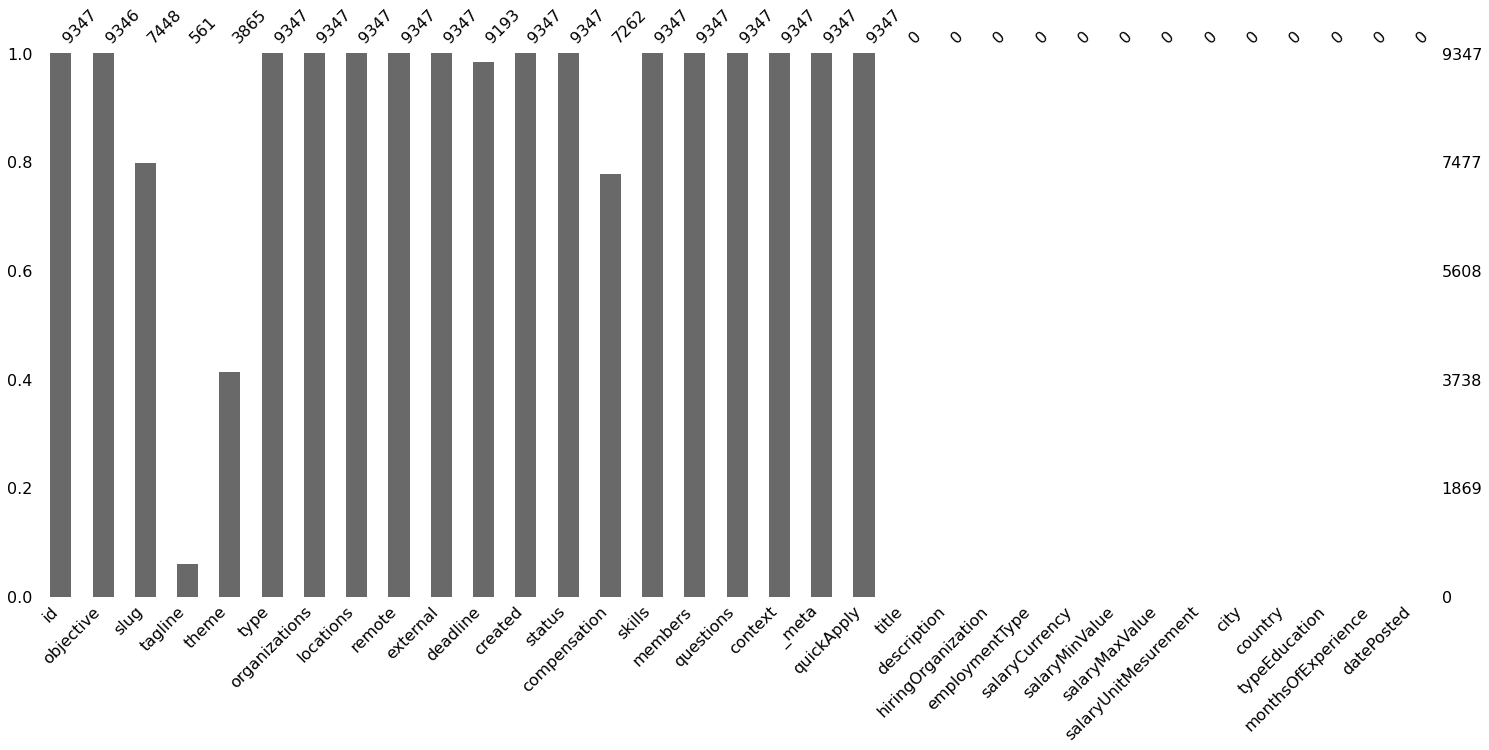

In [5]:
msno.bar(df_td)

In [6]:
df_td_copy = df_td.copy()

list_df = list(df_td)
labels_drop = ['tagline', 'theme'] + list_df[20:]
df_td.drop(labels_drop, inplace=True, axis=1)

df_td.tail()

id                                        objective  \
9342  EW766Kry     Product Marketing Manager, Growth & Consumer   
9343  PW9667wg  Product Marketing Manager, Enterprise Solutions   
9344  2W166Qwq                 Sr.  ServiceNow Business Analyst   
9345  JWO11GdQ                            Director of Marketing   
9346  NwB6zpwb                  Implementation Analyst (Remote)   

                                                   slug                  type  \
9342  coursera-product-marketing-manager-growth--con...  full-time-employment   
9343  coursera-product-marketing-manager-enterprise-...  full-time-employment   
9344                                                NaN  full-time-employment   
9345                   coursera-director-of-marketing-3  full-time-employment   
9346               hicx-implementation-analyst-remote-1  full-time-employment   

                                          organizations          locations  \
9342  [{'id': 748288, 'name': 'Coursera', 'picture':...  ['United States']   
9343  [{'id': 748288, 'name': 'Coursera', 'picture':...                 []   
9344  [{'id': 550226, 'name': 'NovoScale', 'picture'...                 []   
9345  [{'id': 748288, 'name': 'Coursera', 'picture':...                 []   
9346  [{'id': 744530, 'name': 'HICX', 'picture': 'ht...                 []   

      remote  external                  deadline                   created  \
9342    True     False  2020-11-05T04:30:00.000Z  2020-10-05T19:30:56.000Z   
9343    True     False  2020-11-05T04:30:00.000Z  2020-10-05T19:23:28.000Z   
9344    True     False  2020-11-05T04:30:00.000Z  2020-10-05T19:15:35.000Z   
9345    True     False  2020-11-05T04:30:00.000Z  2020-10-05T19:14:09.000Z   
9346    True     False  2020-11-05T04:30:00.000Z  2020-10-05T16:54:36.000Z   

      status                                       compensation  \
9342  closed  {'data': {'code': 'fixed', 'currency': 'USD$',...   
9343  closed  {'data': {'code': 'fixed', 'currency': 'USD$',...   
9344  closed  {'data': {'code': 'range', 'currency': 'USD$',...   
9345  closed  {'data': {'code': 'range', 'currency': 'USD$',...   
9346  closed  {'data': {'code': 'range', 'currency': 'USD$',...   

                                                 skills  \
9342  [{'name': 'Product Marketing', 'experience': '...   
9343  [{'name': 'Product Marketing', 'experience': '...   
9344  [{'name': 'Business Analysis', 'experience': '...   
9345  [{'name': 'Marketing Management', 'experience'...   
9346  [{'name': 'Communication skills', 'experience'...   

                                                members questions  \
9342  [{'subjectId': None, 'name': 'Jeff Maggioncald...        []   
9343  [{'subjectId': None, 'name': 'Jeff Maggioncald...        []   
9344  [{'subjectId': None, 'name': 'Jeffrey Gregory'...        []   
9345  [{'subjectId': None, 'name': 'Jeff Maggioncald...        []   
9346  [{'subjectId': None, 'name': 'Costas Xyloyiann...        []   

               context                                              _meta  \
9342  {'signaled': []}  {'rank': {'position': 30415, 'value': 0.1625, ...   
9343  {'signaled': []}  {'rank': {'position': 30416, 'value': 0.1625, ...   
9344  {'signaled': []}  {'rank': {'position': 30417, 'value': 0.1625, ...   
9345  {'signaled': []}  {'rank': {'position': 30418, 'value': 0.1625, ...   
9346  {'signaled': []}  {'rank': {'position': 30419, 'value': 0.1625, ...   

      quickApply  
9342       False  
9343       False  
9344       False  
9345       False  
9346       False

In [7]:
df_td.shape

(9347, 18)

In [9]:
df_td = df_td.replace(['[]', np.nan)
df_td.tail()

id                                        objective  \
9342  EW766Kry     Product Marketing Manager, Growth & Consumer   
9343  PW9667wg  Product Marketing Manager, Enterprise Solutions   
9344  2W166Qwq                 Sr.  ServiceNow Business Analyst   
9345  JWO11GdQ                            Director of Marketing   
9346  NwB6zpwb                  Implementation Analyst (Remote)   

                                                   slug                  type  \
9342  coursera-product-marketing-manager-growth--con...  full-time-employment   
9343  coursera-product-marketing-manager-enterprise-...  full-time-employment   
9344                                                NaN  full-time-employment   
9345                   coursera-director-of-marketing-3  full-time-employment   
9346               hicx-implementation-analyst-remote-1  full-time-employment   

                                          organizations          locations  \
9342  [{'id': 748288, 'name': 'Coursera', 'picture':...  ['United States']   
9343  [{'id': 748288, 'name': 'Coursera', 'picture':...                NaN   
9344  [{'id': 550226, 'name': 'NovoScale', 'picture'...                NaN   
9345  [{'id': 748288, 'name': 'Coursera', 'picture':...                NaN   
9346  [{'id': 744530, 'name': 'HICX', 'picture': 'ht...                NaN   

      remote  external                  deadline                   created  \
9342    True     False  2020-11-05T04:30:00.000Z  2020-10-05T19:30:56.000Z   
9343    True     False  2020-11-05T04:30:00.000Z  2020-10-05T19:23:28.000Z   
9344    True     False  2020-11-05T04:30:00.000Z  2020-10-05T19:15:35.000Z   
9345    True     False  2020-11-05T04:30:00.000Z  2020-10-05T19:14:09.000Z   
9346    True     False  2020-11-05T04:30:00.000Z  2020-10-05T16:54:36.000Z   

      status                                       compensation  \
9342  closed  {'data': {'code': 'fixed', 'currency': 'USD$',...   
9343  closed  {'data': {'code': 'fixed', 'currency': 'USD$',...   
9344  closed  {'data': {'code': 'range', 'currency': 'USD$',...   
9345  closed  {'data': {'code': 'range', 'currency': 'USD$',...   
9346  closed  {'data': {'code': 'range', 'currency': 'USD$',...   

                                                 skills  \
9342  [{'name': 'Product Marketing', 'experience': '...   
9343  [{'name': 'Product Marketing', 'experience': '...   
9344  [{'name': 'Business Analysis', 'experience': '...   
9345  [{'name': 'Marketing Management', 'experience'...   
9346  [{'name': 'Communication skills', 'experience'...   

                                                members questions  \
9342  [{'subjectId': None, 'name': 'Jeff Maggioncald...       NaN   
9343  [{'subjectId': None, 'name': 'Jeff Maggioncald...       NaN   
9344  [{'subjectId': None, 'name': 'Jeffrey Gregory'...       NaN   
9345  [{'subjectId': None, 'name': 'Jeff Maggioncald...       NaN   
9346  [{'subjectId': None, 'name': 'Costas Xyloyiann...       NaN   

               context                                              _meta  \
9342  {'signaled': []}  {'rank': {'position': 30415, 'value': 0.1625, ...   
9343  {'signaled': []}  {'rank': {'position': 30416, 'value': 0.1625, ...   
9344  {'signaled': []}  {'rank': {'position': 30417, 'value': 0.1625, ...   
9345  {'signaled': []}  {'rank': {'position': 30418, 'value': 0.1625, ...   
9346  {'signaled': []}  {'rank': {'position': 30419, 'value': 0.1625, ...   

      quickApply  
9342       False  
9343       False  
9344       False  
9345       False  
9346       False

<AxesSubplot:>

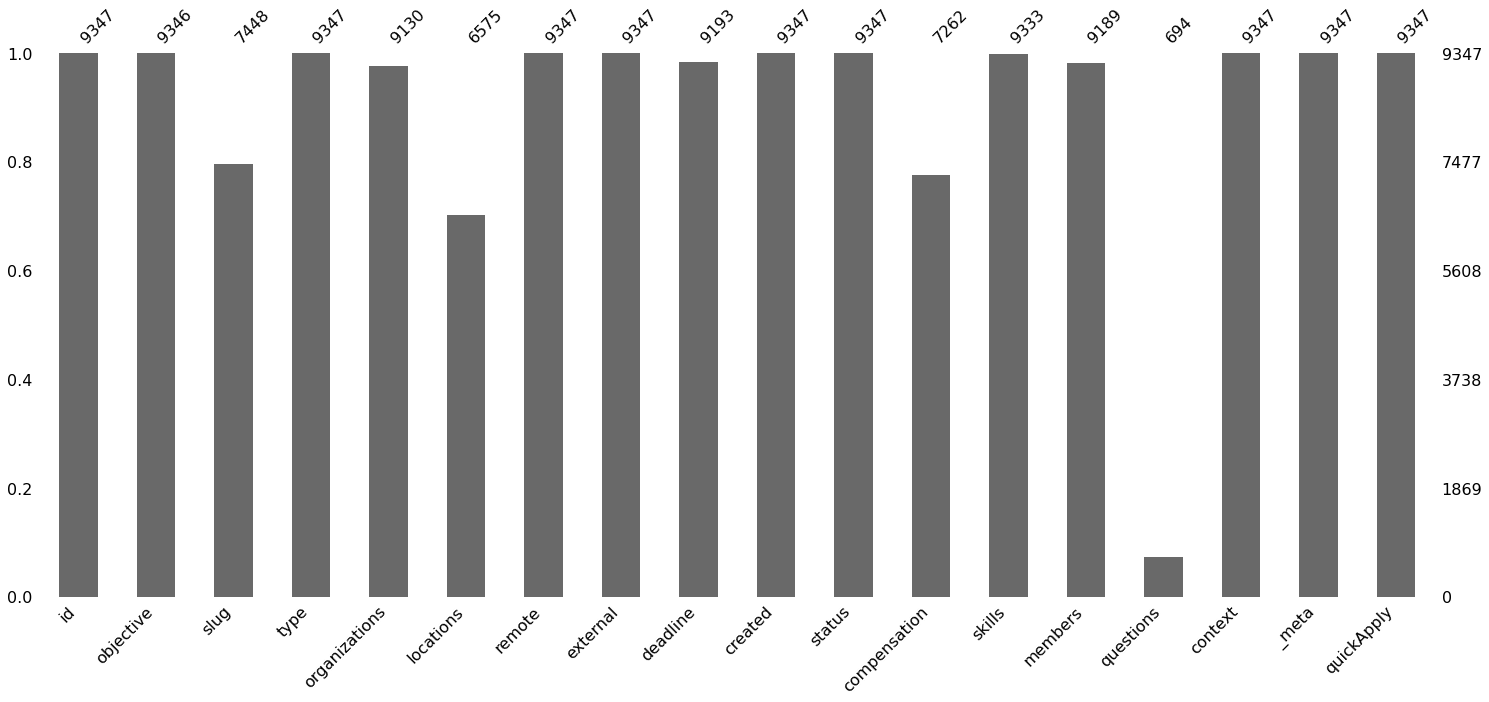

In [10]:
msno.bar(df_td)

In [38]:
import ast
import re


def min_hourly_usd(column):
    try:
        replace = column.replace("\'", "\"")
        str_to_dic = ast.literal_eval(replace)
        return str_to_dic['data']['minHourlyUSD']
    except:
        return np.nan

df_td.drop(['questions', 'id'], inplace=True, axis=1)

In [39]:
df_td['min_Hourly_USD'] = df_td['compensation'].apply(min_hourly_usd)

df_td

objective  \
0                                    Senior PHP/Laravel   
1                  Jr. Sales Development Representative   
2     Diseñador gráfico: Imágenes, videos, animacion...   
3                             Junior software developer   
4                               Transaction coordinator   
...                                                 ...   
9342       Product Marketing Manager, Growth & Consumer   
9343    Product Marketing Manager, Enterprise Solutions   
9344                   Sr.  ServiceNow Business Analyst   
9345                              Director of Marketing   
9346                    Implementation Analyst (Remote)   

                                                   slug                  type  \
0                  level60-consulting-senior-phplaravel         flexible-jobs   
1       alltherooms-jr-sales-development-representative  full-time-employment   
2     joinnet-diseador-grfico-imgenes-videos-animaci...         flexible-jobs   
3                                                   NaN         flexible-jobs   
4              the-carroll-team-transaction-coordinator  full-time-employment   
...                                                 ...                   ...   
9342  coursera-product-marketing-manager-growth--con...  full-time-employment   
9343  coursera-product-marketing-manager-enterprise-...  full-time-employment   
9344                                                NaN  full-time-employment   
9345                   coursera-director-of-marketing-3  full-time-employment   
9346               hicx-implementation-analyst-remote-1  full-time-employment   

                                          organizations          locations  \
0     [{'id': 773855, 'name': 'Level60 Consulting', ...       ['Colombia']   
1     [{'id': 721967, 'name': 'AllTheRooms', 'pictur...       ['Colombia']   
2     [{'id': 595208, 'name': 'Joinnet', 'picture': ...       ['Colombia']   
3     [{'id': 748404, 'name': 'Torre Labs', 'picture...                NaN   
4     [{'id': 1046588, 'name': 'The Carroll Team', '...                NaN   
...                                                 ...                ...   
9342  [{'id': 748288, 'name': 'Coursera', 'picture':...  ['United States']   
9343  [{'id': 748288, 'name': 'Coursera', 'picture':...                NaN   
9344  [{'id': 550226, 'name': 'NovoScale', 'picture'...                NaN   
9345  [{'id': 748288, 'name': 'Coursera', 'picture':...                NaN   
9346  [{'id': 744530, 'name': 'HICX', 'picture': 'ht...                NaN   

      remote  external                  deadline                   created  \
0       True     False                       NaN  2021-04-17T17:11:18.000Z   
1       True     False                       NaN  2021-06-16T20:13:48.000Z   
2       True     False                       NaN  2020-07-04T21:38:49.000Z   
3       True     False  2022-04-08T23:51:57.000Z  2022-03-09T23:51:57.000Z   
4       True     False  2022-04-02T16:54:29.000Z  2022-03-03T16:54:29.000Z   
...      ...       ...                       ...                       ...   
9342    True     False  2020-11-05T04:30:00.000Z  2020-10-05T19:30:56.000Z   
9343    True     False  2020-11-05T04:30:00.000Z  2020-10-05T19:23:28.000Z   
9344    True     False  2020-11-05T04:30:00.000Z  2020-10-05T19:15:35.000Z   
9345    True     False  2020-11-05T04:30:00.000Z  2020-10-05T19:14:09.000Z   
9346    True     False  2020-11-05T04:30:00.000Z  2020-10-05T16:54:36.000Z   

      status                                       compensation  \
0       open  {'data': {'code': 'range', 'currency': 'USD$',...   
1       open  {'data': {'code': 'range', 'currency': 'USD$',...   
2       open                                                NaN   
3       open  {'data': {'code': 'fixed', 'currency': 'USD$',...   
4       open  {'data': {'code': 'fixed', 'currency': 'USD$',...   
...      ...                                                ...   
9342  closed  {'data'

In [40]:
df_td[["remote","min_Hourly_USD"]].groupby("remote").mean()

min_Hourly_USD
remote                
False       341.134075
True        180.617444

In [60]:
remote_means.index.tolist()

[False, True]

In [65]:
remote_means.iloc[1][0]

180.61744422467288

Media de pagos por hora mínimos en dólares, los cargos que no son remotos suelen pagar mejor.

In [67]:
remote_means = df_td[["remote","min_Hourly_USD"]].groupby("remote").mean()
remote = remote_means.iloc[1][0]
non_remote = remote_means.iloc[0][0]
percent = (non_remote-remote)/remote
print(f"Un cargo prensecial gana en un {percent*100:.2f}% más que los remotos en promedio")

Un cargo prensecial gana en un 88.87% más que los remotos en promedio


In [68]:
def location(column):
    try:
        str_to_list = ast.literal_eval(column)
        return str_to_list
    except:
        return np.nan

df_td['locations'] = df_td['locations'].apply(location)

df_td.tail()

objective  \
9342     Product Marketing Manager, Growth & Consumer   
9343  Product Marketing Manager, Enterprise Solutions   
9344                 Sr.  ServiceNow Business Analyst   
9345                            Director of Marketing   
9346                  Implementation Analyst (Remote)   

                                                   slug                  type  \
9342  coursera-product-marketing-manager-growth--con...  full-time-employment   
9343  coursera-product-marketing-manager-enterprise-...  full-time-employment   
9344                                                NaN  full-time-employment   
9345                   coursera-director-of-marketing-3  full-time-employment   
9346               hicx-implementation-analyst-remote-1  full-time-employment   

                                          organizations        locations  \
9342  [{'id': 748288, 'name': 'Coursera', 'picture':...  [United States]   
9343  [{'id': 748288, 'name': 'Coursera', 'picture':...              NaN   
9344  [{'id': 550226, 'name': 'NovoScale', 'picture'...              NaN   
9345  [{'id': 748288, 'name': 'Coursera', 'picture':...              NaN   
9346  [{'id': 744530, 'name': 'HICX', 'picture': 'ht...              NaN   

      remote  external                  deadline                   created  \
9342    True     False  2020-11-05T04:30:00.000Z  2020-10-05T19:30:56.000Z   
9343    True     False  2020-11-05T04:30:00.000Z  2020-10-05T19:23:28.000Z   
9344    True     False  2020-11-05T04:30:00.000Z  2020-10-05T19:15:35.000Z   
9345    True     False  2020-11-05T04:30:00.000Z  2020-10-05T19:14:09.000Z   
9346    True     False  2020-11-05T04:30:00.000Z  2020-10-05T16:54:36.000Z   

      status                                       compensation  \
9342  closed  {'data': {'code': 'fixed', 'currency': 'USD$',...   
9343  closed  {'data': {'code': 'fixed', 'currency': 'USD$',...   
9344  closed  {'data': {'code': 'range', 'currency': 'USD$',...   
9345  closed  {'data': {'code': 'range', 'currency': 'USD$',...   
9346  closed  {'data': {'code': 'range', 'currency': 'USD$',...   

                                                 skills  \
9342  [{'name': 'Product Marketing', 'experience': '...   
9343  [{'name': 'Product Marketing', 'experience': '...   
9344  [{'name': 'Business Analysis', 'experience': '...   
9345  [{'name': 'Marketing Management', 'experience'...   
9346  [{'name': 'Communication skills', 'experience'...   

                                                members           context  \
9342  [{'subjectId': None, 'name': 'Jeff Maggioncald...  {'signaled': []}   
9343  [{'subjectId': None, 'name': 'Jeff Maggioncald...  {'signaled': []}   
9344  [{'subjectId': None, 'name': 'Jeffrey Gregory'...  {'signaled': []}   
9345  [{'subjectId': None, 'name': 'Jeff Maggioncald...  {'signaled': []}   
9346  [{'subjectId': None, 'name': 'Costas Xyloyiann...  {'signaled': []}   

                                                  _meta  quickApply  \
9342  {'rank': {'position': 30415, 'value': 0.1625, ...       False   
9343  {'rank': {'position': 30416, 'value': 0.1625, ...       False   
9344  {'rank': {'position': 30417, 'value': 0.1625, ...       False   
9345  {'rank': {'position': 30418, 'value': 0.1625, ...       False   
9346  {'rank': {'position': 30419, 'value': 0.1625, ...       False   

      min_Hourly_USD  
9342       52.083333  
9343       52.083333  
9344       22.000000  
9345       54.687500  
9346        6.250000

In [94]:
from matplotlib.figure import Figure
import matplotlib.pyplot as plt


plot = df_td['locations'].apply(pd.Series).stack()

In [100]:
sns.set(style="darkgrid")
sns
plt.figure(figsize=(20,10), dpi=600);
sns.histplot(data=plot, common_norm=True)
plt.xticks(plot, rotation=90)
plt.show()

Se puede observar también correlaciones entre las variables, observar también las variables temporales que se tienen, así sea la *deadline* o *created*, normalizar los datos y limitarlos también para tener una descripción gráfica más acorde. Como quiero tratar la parte de automatización lo dejo hasta acá.

# Proceso automatización (RPA)

In [3]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time



In [9]:


driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

#driver = webdriver.Chrome("C:/Program Files/Google/Chrome/Application/chrome.exe")

driver.get("https://www.talentpitch.co/login#")



====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [C:\Users\camil\.wdm\drivers\chromedriver\win32\100.0.4896.60\chromedriver.exe] found in cache


In [14]:
time.sleep(2)

username = driver.find_element(By.XPATH, "//input[@name='email']")
password = driver.find_element(By.XPATH, "//input[@name='password']")

username.send_keys("cagaleanot@unal.edu.co")
password.send_keys("Drawin_0514")

time.sleep(2)

submit = driver.find_element(By.XPATH, "//a[@class='text-center max-w-full inline-block rounded-md text-button w-full  cursor-pointer text-secondary-3 bg-secondary hover:text-secondary-2  border border-secondary  px-3 py-3  hover:shadow']").click()

time.sleep(2)



In [15]:
talentee = driver.find_element(By.XPATH, "//img[@class='h-32 w-32 cursor-pointer border-4 border-gray-4 shadow-md rounded-full object-cover mb-8']").click()

In [32]:
time.sleep(2)

driver.get("https://www.talentpitch.co/community/talentpitch")

time.sleep(2)

comment = driver.find_element(By.XPATH, "//div[@class='w-full bg-white rounded-md border-2 p-2 text-caption text-gray-2 cursor-text']").click()

time.sleep(2)

main_div = driver.find_element(By.XPATH, "//div[@class='ql-editor ql-blank']").click()

time.sleep(2)

paragraphs = driver.find_elements(By.TAG_NAME, "p")
for p in paragraphs:
    try:
        print(f'Work {p}')
        p.send_keys("Soy un bot *bip* *bop*")
    except:
        continue


submit = driver.find_element(By.XPATH, "//a[@class='text-center max-w-full inline-block rounded-md text-button  cursor-pointer text-secondary-3 bg-secondary hover:text-secondary-2  border border-secondary  px-3 py-3  hover:shadow']").click()
time.sleep(2)

Work <selenium.webdriver.remote.webelement.WebElement (session="0ce35b39646ae6407ccb6c2ba317fdfe", element="7d20132d-697a-4583-adcd-2ff22cfb63d7")>
Work <selenium.webdriver.remote.webelement.WebElement (session="0ce35b39646ae6407ccb6c2ba317fdfe", element="5a056a6e-289f-4dcd-8b4c-616aaa055598")>
Work <selenium.webdriver.remote.webelement.WebElement (session="0ce35b39646ae6407ccb6c2ba317fdfe", element="b631d18b-bd09-4d06-b160-788e75ec1ba7")>
Work <selenium.webdriver.remote.webelement.WebElement (session="0ce35b39646ae6407ccb6c2ba317fdfe", element="afcb68dc-f93d-40b6-8d11-7ea7bad4d735")>
Work <selenium.webdriver.remote.webelement.WebElement (session="0ce35b39646ae6407ccb6c2ba317fdfe", element="2fc9aadf-463b-4c53-a266-8e2c9350c89c")>
Work <selenium.webdriver.remote.webelement.WebElement (session="0ce35b39646ae6407ccb6c2ba317fdfe", element="022229a2-0b11-47da-9f1c-bc85106f6c34")>
Work <selenium.webdriver.remote.webelement.WebElement (session="0ce35b39646ae6407ccb6c2ba317fdfe", element="cd45

Work <selenium.webdriver.remote.webelement.WebElement (session="0ce35b39646ae6407ccb6c2ba317fdfe", element="092c68fb-9262-470b-b07d-cc1d7cca7dd0")>
Work <selenium.webdriver.remote.webelement.WebElement (session="0ce35b39646ae6407ccb6c2ba317fdfe", element="db261a0f-d3b6-4007-bb73-f9afae7b3c5d")>
Work <selenium.webdriver.remote.webelement.WebElement (session="0ce35b39646ae6407ccb6c2ba317fdfe", element="cda7b7fb-1c04-49d2-9d83-3e9f09b289fa")>
Work <selenium.webdriver.remote.webelement.WebElement (session="0ce35b39646ae6407ccb6c2ba317fdfe", element="76d1a2b5-e6c5-4339-a997-18ec5b133872")>
Work <selenium.webdriver.remote.webelement.WebElement (session="0ce35b39646ae6407ccb6c2ba317fdfe", element="cac310ea-fd20-4d63-839e-11e9c2089eca")>
Work <selenium.webdriver.remote.webelement.WebElement (session="0ce35b39646ae6407ccb6c2ba317fdfe", element="03da178b-62f4-40d2-b361-1e3f9fdb4fa3")>
Work <selenium.webdriver.remote.webelement.WebElement (session="0ce35b39646ae6407ccb6c2ba317fdfe", element="6d0f

Work <selenium.webdriver.remote.webelement.WebElement (session="0ce35b39646ae6407ccb6c2ba317fdfe", element="babe2a7c-ed8d-4730-b688-71890b7566c4")>
Work <selenium.webdriver.remote.webelement.WebElement (session="0ce35b39646ae6407ccb6c2ba317fdfe", element="349b612e-1822-4114-b8cf-30a3d229b3af")>
Work <selenium.webdriver.remote.webelement.WebElement (session="0ce35b39646ae6407ccb6c2ba317fdfe", element="2cc6cf38-55e4-4301-af13-0a545a0153b5")>
Work <selenium.webdriver.remote.webelement.WebElement (session="0ce35b39646ae6407ccb6c2ba317fdfe", element="c6906ab4-571e-49ab-9bcc-966a82ef8256")>
Work <selenium.webdriver.remote.webelement.WebElement (session="0ce35b39646ae6407ccb6c2ba317fdfe", element="79a23294-266e-48da-8552-67963f3b126c")>
Work <selenium.webdriver.remote.webelement.WebElement (session="0ce35b39646ae6407ccb6c2ba317fdfe", element="b26b03a3-58f8-40e7-9793-b419a6adb14e")>
Work <selenium.webdriver.remote.webelement.WebElement (session="0ce35b39646ae6407ccb6c2ba317fdfe", element="6db8

In [19]:
paragraphs = driver.find_elements(By.TAG_NAME, "p")

counter=0
for p in paragraphs:
    print(counter)
    print(p.text)
    counter += 1

0

1

2
Reinventamos la conexión entre personas y organizaciones transformando la forma de atraer, conectar, ... Ver más
3
Abierta
4

5

6
#TalentPitch
7
El amor es como una escalera, que va ascendiendo desde la atracción mutua entre los cuerpos hacía un amor más profundo el amor a las almas que se manifiesta en el amor por las obras de la humanidad, el amor por la cultura, el amor por las ideas, el amor por el saber, en griego filosofía, enamorándose
del otro es una manera de enamorarnos de la humanidad toda, es una manera de ser mas humano, que el amor nos conecta un poco más con las cosas y nos saca de nosotros mismos, ¿no es poco no?
8
#TalentPitch
9
Estamos siempre resignificando quienes somos, repensandonos en nuestro presente pero también en nuestro pasado, luchamos por un futuro mejor y también para que no se nos arrebate nuestra historia.
10
#TalentPitch
11
Estamos siempre resignificando quienes somos, repensandonos en nuestro presente pero también en nuestro pasado, luchamos 

In [21]:
paragraphs[-6].text

'Prácticas Profesionales'

In [ ]:
username = input('Ingresar correo eléctronico: ')
access_key = input('Ingresar contraseña: ')

def test_login(self):
    login_url = "https://www.talentpitch.co/login#"
    pre_home_url = "https://www.talentpitch.co/pre-home"

    self.driver.get(login_url)
    login_email = self.driver.find_element_by_xpath(
        "//input[@id='email']"
    )
    login_password = self.driver.find_element_by_xpath(
        "//input[@id='password']"
    )
    login_button = self.driver.find_element_by_xpath(
        "//button[@id='login-button']"
    )
 
    login_email.send_keys(email)
    login_password.send_keys(password)
    login_button.click()
 
    # if we are on right page
    if self.driver.current_url == DASHBOARD_URL :
        assert True
        # time to get recent tests
        self.get_recent_tests()
    else:
        print(" something went wrong !!")
        assert Fals